In [1]:
import pandas_datareader as pdr
key='bfefa72b58ce16638e4384eb6beea09403def336'
df1 = pdr.get_data_tiingo('GOOG', api_key=key)
df1.to_csv('goog.csv')
df2 = pdr.get_data_tiingo('MSFT', api_key=key)
df2.to_csv('msft.csv')
df3 = pdr.get_data_tiingo('AAPL', api_key=key)
df3.to_csv('aapl.csv')
df4 = pdr.get_data_tiingo('NVDA', api_key=key)
df4.to_csv('nvda.csv')
import pandas as pd

In [12]:
df_g=df1
df_m=df2
df_a=df3
df_n=df4

In [99]:
df_g.index[0][0]

'GOOG'

In [16]:
# define function to compute log returns
import numpy as np
def log_price(series, periods=1):
    return np.log(series).diff(periods=periods)

In [18]:
close_gg=log_price(df_g['close'])
close_ms=log_price(df_m['close'])
close_ap=log_price(df_a['close'])
close_nv=log_price(df_n['close'])

In [67]:
import matplotlib.pyplot as plt

In [ ]:
tickers=['GOOGL','MSFT','AAPL','NVDA']

In [175]:
def correl(d1,d2):
    merged=pd.merge(d1,d2,on='date')
    merged=merged[1:]
    merged.reset_index(inplace=True)
    merged.drop(['date'],axis=1,inplace=True)
    merged=merged[['close_x','close_y']]
    #Group consecutive 7 rows and calculate correlation
    corr_time=merged.groupby(merged.index//7
                            ).corr().loc[:,'close_x'].loc[:,'close_y']
    corr_time.plot()
    plt.xticks([])
    plt.ylabel("Correlation")
    title="7 days interval Correlation between "+d1.index[0][0]+" and "+d2.index[0][0]+" over time"
    plt.title(title);
    return corr_time.mean()

In [176]:
df_list=[df_g,df_m,df_a,df_n]

0.6582909089953876

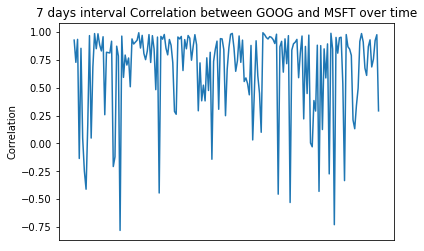

In [177]:
correl(df_g,df_m)

0.5773526890761834

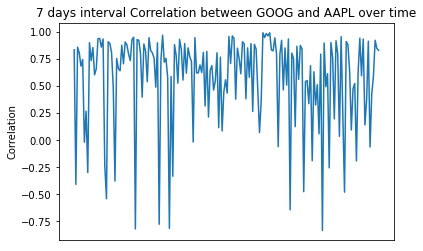

In [178]:
correl(df_g,df_a)

0.489905725862357

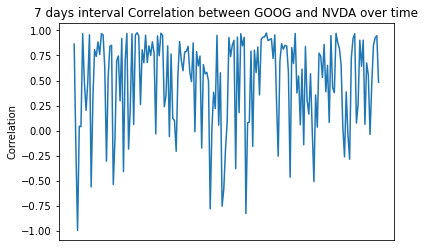

In [179]:
correl(df_g,df_n)

0.5323458427751773

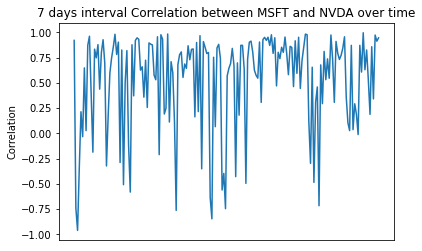

In [180]:
correl(df_m,df_n)

0.6231922908528778

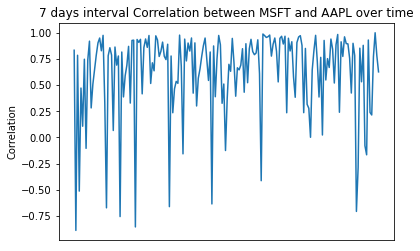

In [181]:
correl(df_m,df_a)

0.54822526630232

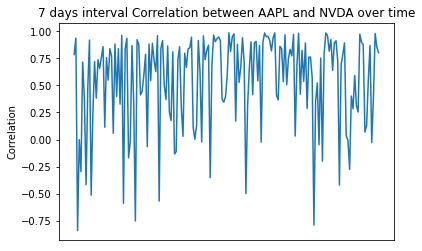

In [182]:
correl(df_a,df_n)